In [57]:
!python --version

Python 3.13.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)

themeda = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(20, 35)).drop(0, axis=0)
themeda = themeda.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)

# coordinate info of sample sites
geo = pd.read_csv(r"../data/Emma Sumner/field_sorghum_locations.csv")

# ___Chemical properties___
-----------------

In [3]:
themeda

,lab_number,date_received,customer_sample_id,sample_name_1,sample_name_2,latitude,longitude,depth,colour,gravel_percent,...,ph_level_cacl2,ph_level_h2o,total_nitrogen,total_phosphorus,total_carbon,prcnt_clay,prcnt_course_sand,prcnt_fine_sand,prcnt_sand,prcnt_silt
1,2KGS24024,12/09/2024,TT1,BWR QLD,Bruce Weir Rd Qld,-17.126588,145.129246,0-10,GRWH,5-Oct,...,5.4,6.8,0.08,62.2,1.12,11.22,35.53,40.96,76.49,12.3
2,2KGS24025,12/09/2024,TT2,BUM NSW,Bumberry NSW,-17.126588,145.129246,0-10,LTBR,5,...,5.0,6.2,0.12,159,1.75,11.78,9.41,65.01,74.42,13.8
3,2KGS24026,12/09/2024,TT3,COBB SA,Cobbler Ck SA,-33.131303,148.427159,0-10,BR,5,...,6.1,7.0,0.22,258.6,3.07,31.69,18.82,29.01,47.83,20.48
4,2KGS24027,12/09/2024,TT4,CHS VIC,Condah Hotspur Rd Vic,-34.784167,138.696667,0-10,GRBR,5,...,5.1,6.1,0.11,91,1.56,12.22,38.15,44.51,82.66,5.11
5,2KGS24028,12/09/2024,TT5,DAL QLD,Dalby Qld,-37.918000,141.648000,0-10,BK,5,...,6.0,6.9,0.27,402.1,3.96,23.11,35.26,26.89,62.15,14.74
6,2KGS24029,12/09/2024,TT6,HH NSW,Hornsby Heights NSW,-27.156601,151.235198,0-10,DKBR,5-Oct,...,4.9,5.9,0.18,229.2,4.04,13.88,51.89,23.51,75.4,10.72
7,2KGS24030,12/09/2024,TT7,JIN NSW,Jindabyne NSW,-33.629080,151.113020,0-10,YWGR,5,...,6.0,7.0,0.03,221.2,0.53,5.98,68.36,21.64,90,4.02
8,2KGS24031,12/09/2024,TT8,MAR QLD,Marlborough Qld,-36.431837,148.620779,0-10,GRBR,5,...,5.3,6.2,0.15,278.7,2.33,14.95,2.77,56.28,59.05,25.99
9,2KGS24032,12/09/2024,TT9,MTT NSW,Mid Turnbull Trail NSW,-22.890693,149.769793,0-10,BK,5,...,5.2,6.2,0.23,271.3,7.01,12.29,54,23.43,77.43,10.29
10,2KGS24033,12/09/2024,TT10,MCK NT,Mitchell Ck NT,-33.445000,150.826000,0-10,GRBR,5-Oct,...,5.2,6.2,0.06,77.9,1.24,11.41,37.88,35.07,72.95,15.63


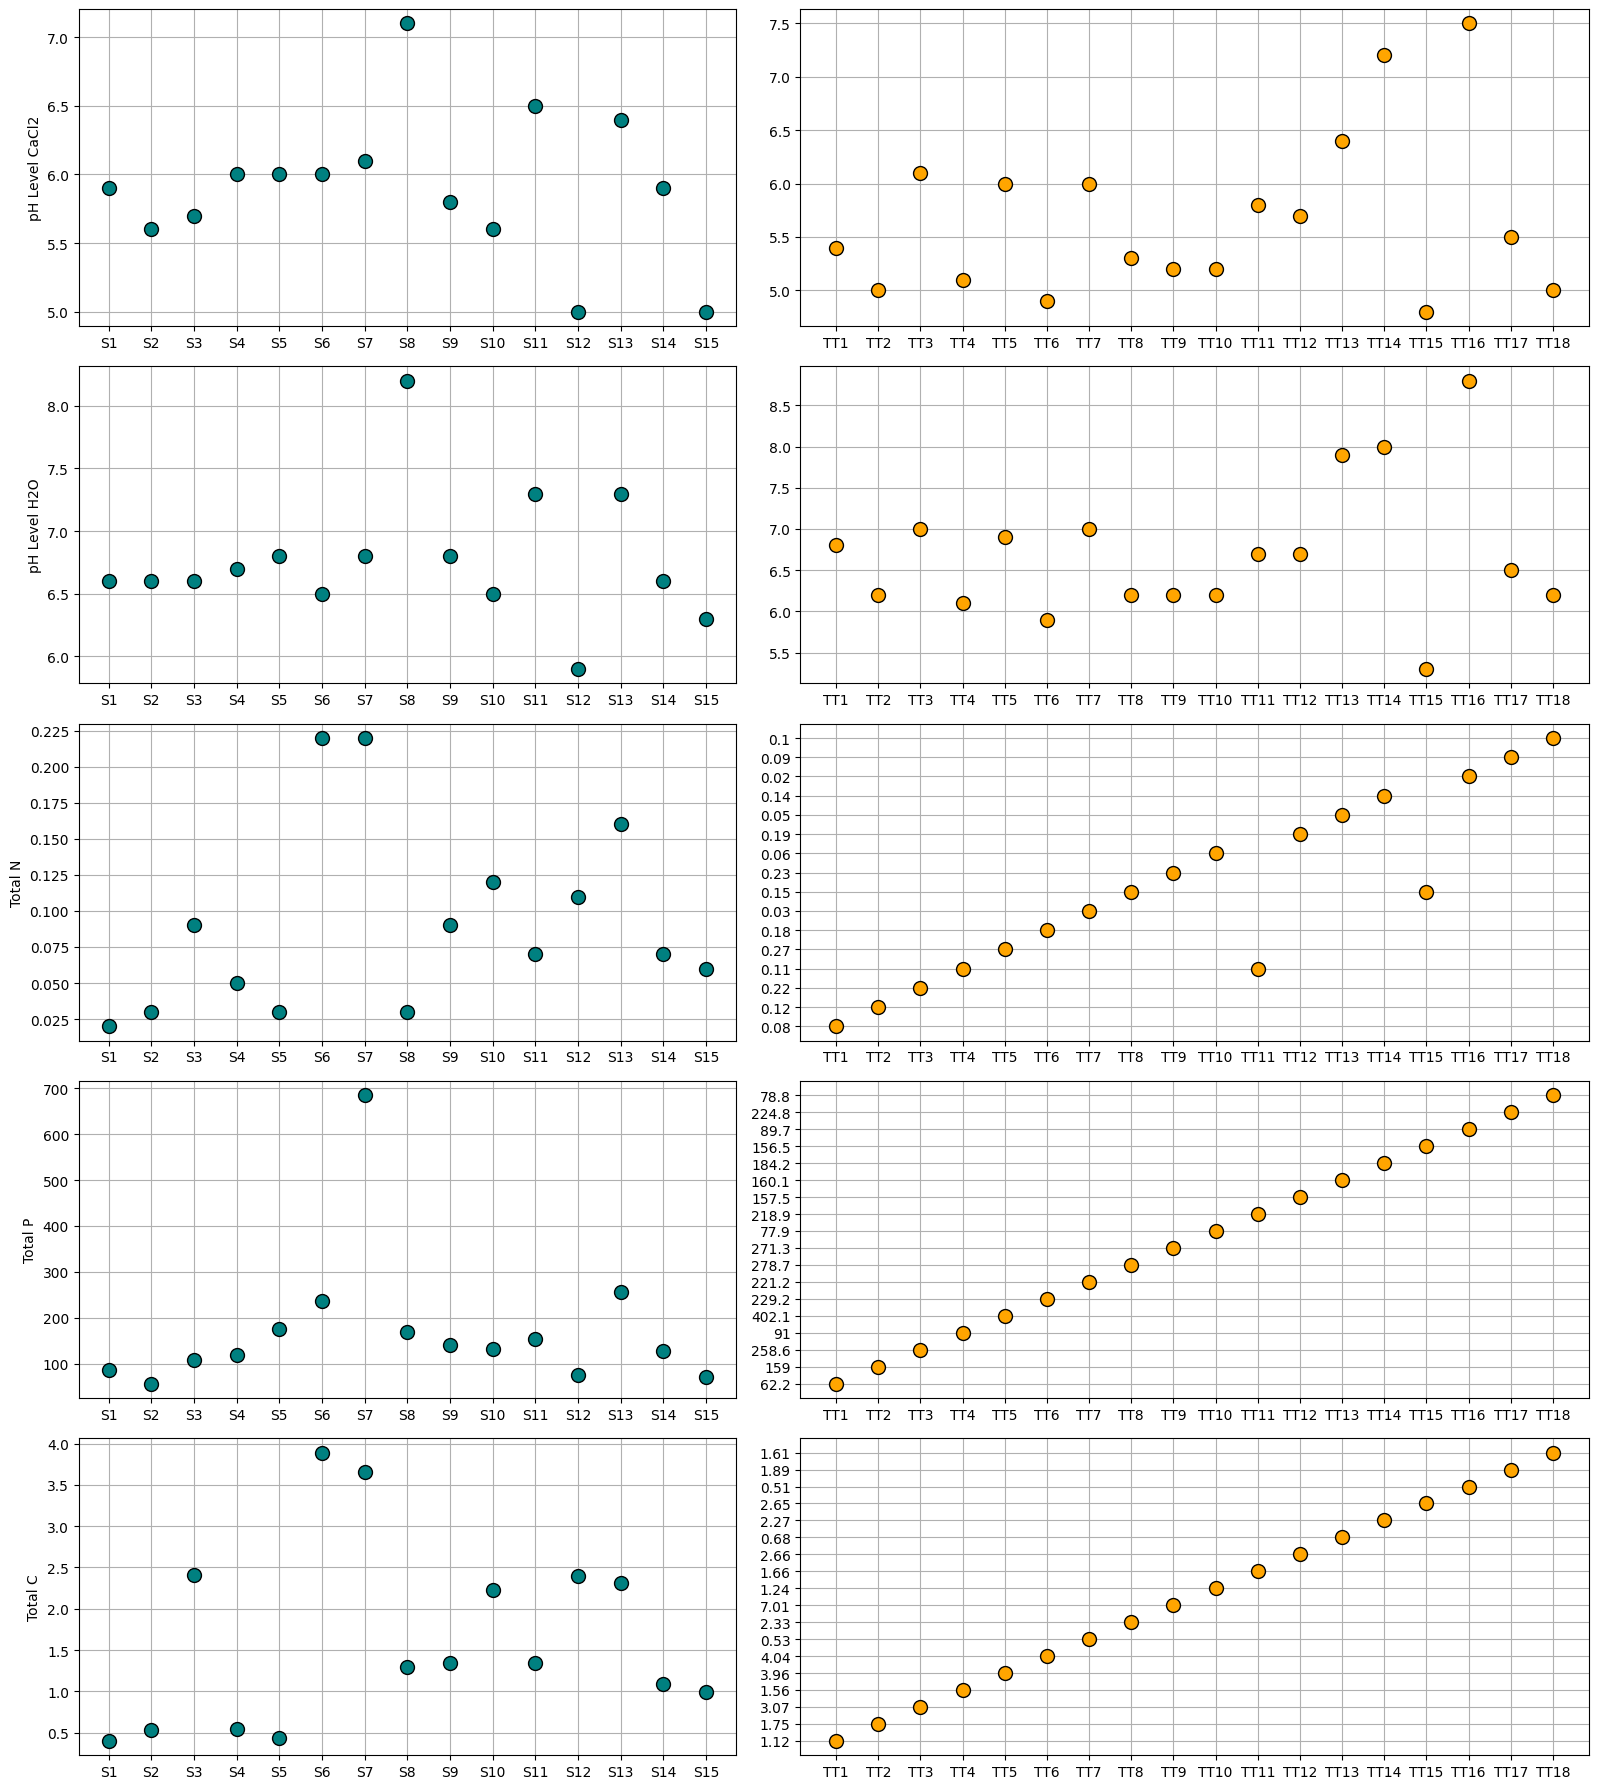

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, width_ratios=(15, 18))
fig.set_size_inches(16, 18)

for (prop, name, (axis_l, axis_r)) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis_l.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis_l.grid()
    axis_l.set_ylabel(name)
    axis_r.plot(themeda.customer_sample_id, themeda[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis_r.grid()
    
plt.tight_layout()
plt.show()

# ___Soil texture___
--------------

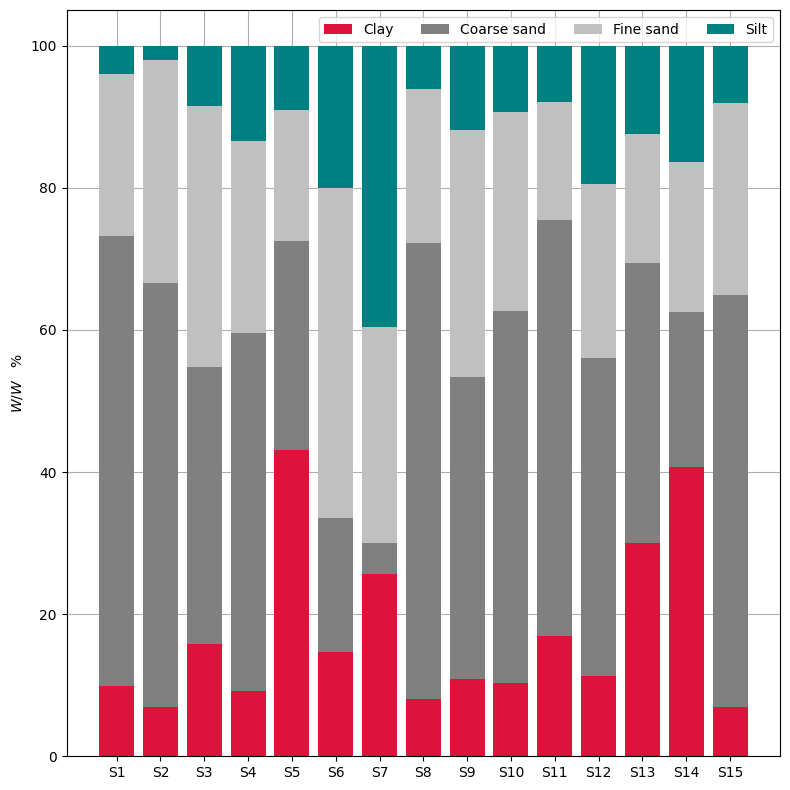

In [10]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_course_sand, bottom=sorghum.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_fine_sand, bottom=sorghum.prcnt_clay+sorghum.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right")
axes.set_ylabel(r"$W/W\hspace{1}\%$")
axes.set_axisbelow(True)
axes.grid()
axes.legend(loc="upper right", ncols=4)
plt.tight_layout()
plt.show()

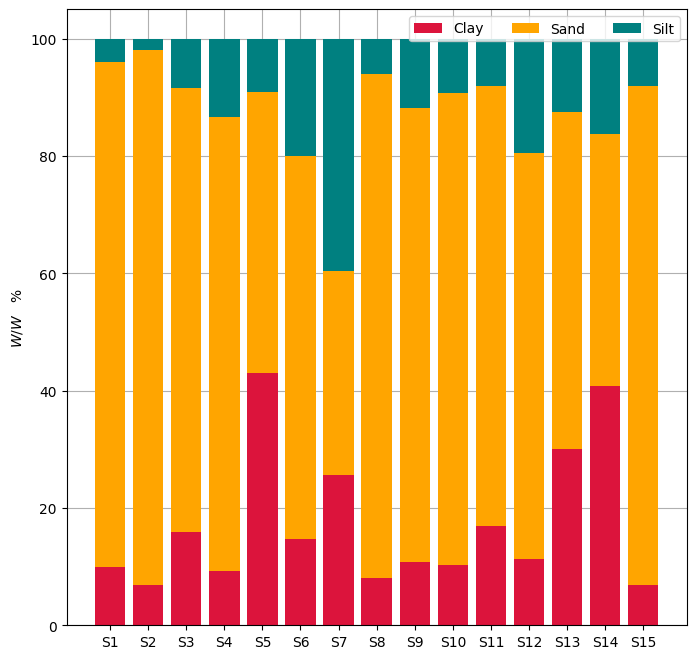

In [13]:
# without differentiating sand into coarse and fine sand
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_sand, bottom=sorghum.prcnt_clay, color="orange", label="Sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right", ncols=3)
axes.set_axisbelow(True)
axes.grid()
axes.set_ylabel(r"$W/W\hspace{1}\%$")
plt.show()

# ___Goegraphics___
-------------

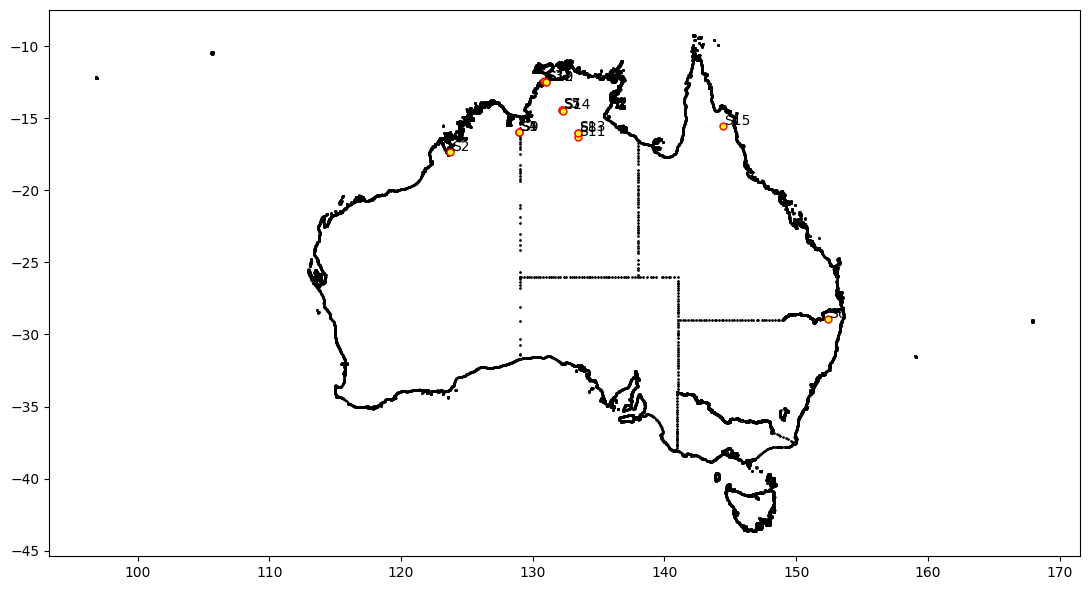

In [54]:
fig, axes = plt.subplots()
fig.set_size_inches(11, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
plt.tight_layout()
plt.show()

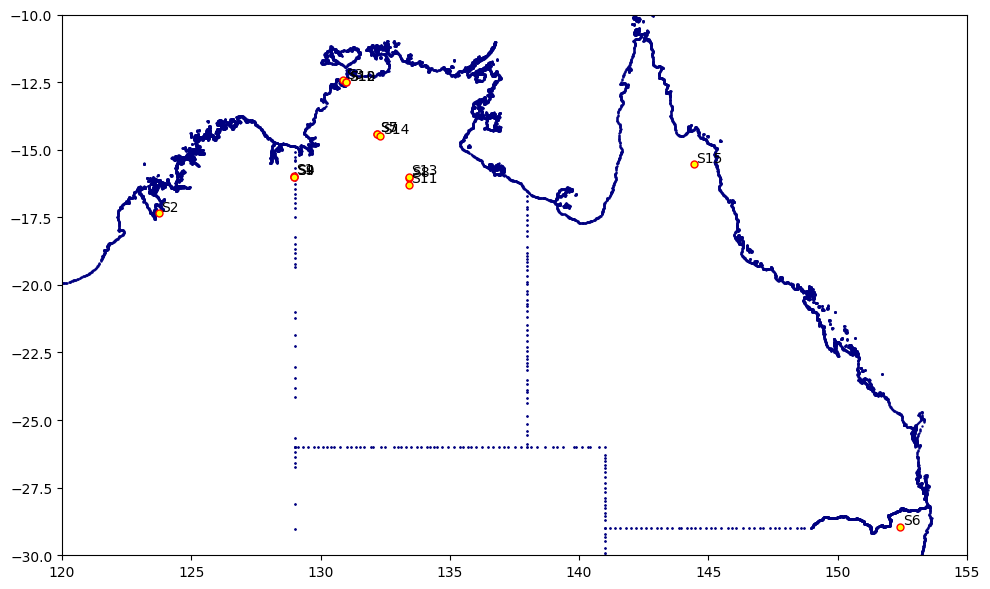

In [56]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
axes.set_ylim(-30, -10)
axes.set_xlim(120, 155)
plt.tight_layout()
plt.show()